### ورودی گرفتن دیتاست 

In [5]:
import pandas as pd
import numpy as np

file_path = 'Compound-data.txt'  
data_frame = pd.read_csv(file_path, delim_whitespace=True, header=None, names=['x', 'y'])

print(data_frame.head())

data = data_frame[['x', 'y']].values

       x      y
0  26.75  22.15
1  29.80  22.15
2  31.55  21.10
3  27.70  20.85
4  29.90  19.95


### single link تعریف تابع محاسبه ی فاصله

In [6]:
def complete_link(C, C_prime):
    return np.max([np.linalg.norm(x - y) for x in C for y in C_prime])


### تعریف تابع خوشه بندی سلسله مراتبی

In [7]:

def hierarchical_clustering(data, distance_func):
    clusters = [[point] for point in data]
    merge_steps = []
    while len(clusters) > 1:
        min_distance = float('inf')
        clusters_to_merge = (0, 0)
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                distance = distance_func(clusters[i], clusters[j])
                if distance < min_distance:
                    min_distance = distance
                    clusters_to_merge = (i, j)
        i, j = clusters_to_merge
        merge_steps.append((i, j, min_distance))
        new_cluster = clusters[i] + clusters[j]
        clusters = [clusters[k] for k in range(len(clusters)) if k not in clusters_to_merge] + [new_cluster]
        print(f"{clusters}\n")
    return merge_steps

### اجرای مراحل خوشه بندی ، نمایش فرم خام دندوگرام خوشه بندی سلسله مراتبی

خوشه باقی میماند n-1 ر این بخش شما ابتدا خوشه بندی را به صورت خام مرحله به مرحله مشاهده میکنید. همانطور که انتظار میرفت در هر مرحله دو خوشه با یکدیگر ادغام میشوند و در پایان هر مرحله 

In [8]:
merge_steps_single = hierarchical_clustering(data, complete_link)

[[array([26.75, 22.15])], [array([29.8 , 22.15])], [array([31.55, 21.1 ])], [array([27.7 , 20.85])], [array([29.9 , 19.95])], [array([26.8 , 19.05])], [array([28.35, 18.25])], [array([30.4 , 17.85])], [array([27.25, 16.7 ])], [array([29.05, 16.  ])], [array([27.15, 14.85])], [array([28.2 , 13.95])], [array([30.35, 13.85])], [array([27.25, 11.95])], [array([29.45, 12.05])], [array([31.55, 12.2 ])], [array([33.05, 10.65])], [array([29.95,  9.85])], [array([28.  ,  9.75])], [array([27.15,  7.85])], [array([29.15,  8.1 ])], [array([31.95,  8.6 ])], [array([34.7 ,  8.55])], [array([34.8 , 12.25])], [array([36.3 , 15.25])], [array([36.6, 13.2])], [array([38.7 , 14.25])], [array([40.3, 15.5])], [array([42.25, 14.25])], [array([40.7, 12.8])], [array([38.6, 12.1])], [array([36.1, 10.5])], [array([38.35, 10.4 ])], [array([37.65,  8.4 ])], [array([40.15,  8.55])], [array([40.8 , 10.65])], [array([42.9 , 11.25])], [array([41.95,  8.5 ])], [array([42.45, 17.45])], [array([40.25, 18.45])], [array([4

###  تعریف تابع نمایش واضح مراحل خوشه بندی و نمایش آن 

In [9]:

def print_merge_steps(merge_steps, method):
    print(f"\n{method} Linkage Merging Steps and Distances:")
    for step, (i, j, distance) in enumerate(merge_steps, 1):
        print(f"Step {step}: Merging clusters {i} and {j} with distance {distance}")


print_merge_steps(merge_steps_single, 'complete')


complete Linkage Merging Steps and Distances:
Step 1: Merging clusters 164 and 166 with distance 0.2915475947422652
Step 2: Merging clusters 390 and 391 with distance 0.3000000000000007
Step 3: Merging clusters 385 and 386 with distance 0.30413812651491007
Step 4: Merging clusters 129 and 134 with distance 0.3605551275463972
Step 5: Merging clusters 205 and 206 with distance 0.3640054944640233
Step 6: Merging clusters 203 and 204 with distance 0.36400549446402425
Step 7: Merging clusters 332 and 333 with distance 0.3807886552931945
Step 8: Merging clusters 63 and 64 with distance 0.38078865529319617
Step 9: Merging clusters 58 and 59 with distance 0.39051248379533327
Step 10: Merging clusters 109 and 110 with distance 0.39051248379533327
Step 11: Merging clusters 315 and 316 with distance 0.39051248379533327
Step 12: Merging clusters 65 and 66 with distance 0.3999999999999986
Step 13: Merging clusters 367 and 368 with distance 0.3999999999999986
Step 14: Merging clusters 53 and 54 wit

### جهت نمایش زیبا تر و شهودی تر نمایه دندوگرام خوشه بندی سلسله مراتبی از توابع خارجی صرفا در این سکشن استفاده کردیم!

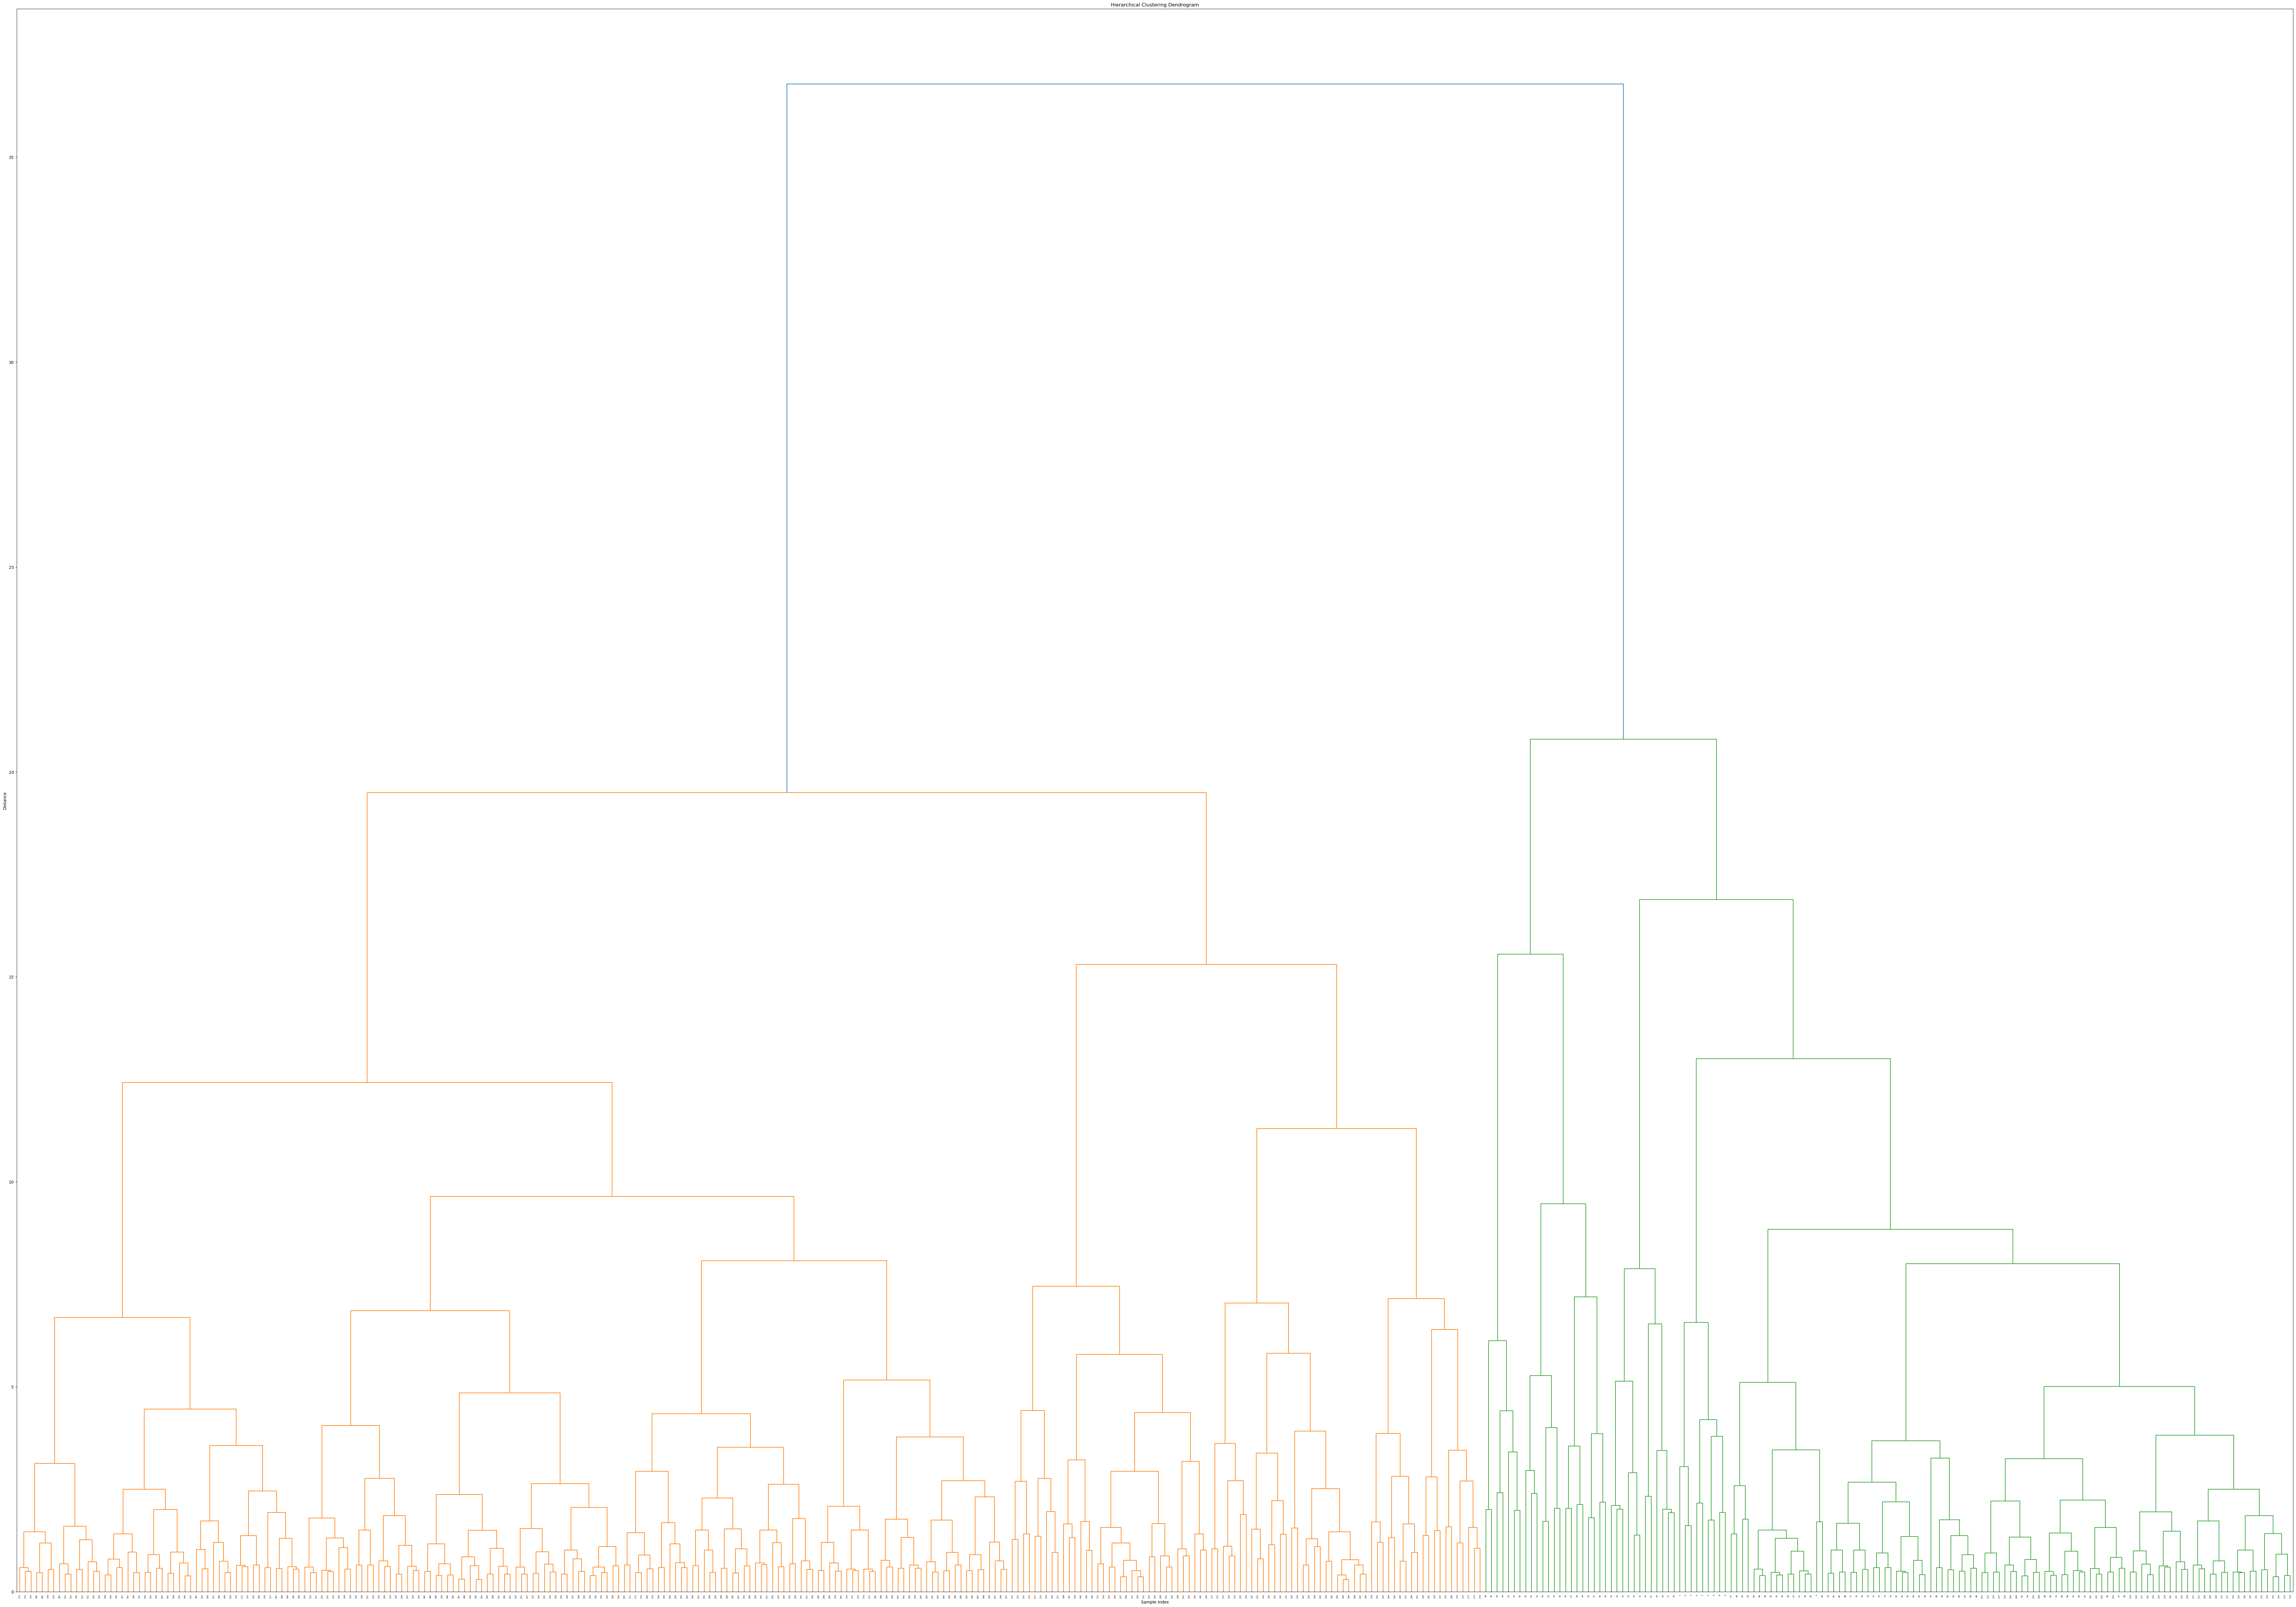

In [10]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform



linkage_data = linkage(data, method='complete', metric='euclidean')


plt.figure(figsize=(100, 70))
dendrogram(linkage_data)
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()


### σ (sigmia) محاسبه ی مقدار
در این مرحله مقدار سیگما که طبق شرح پروژه گفته شده بود برابر مربع متوسط
فاصله در مجموعه داده باشد نسبت به دیتاست داده شده پیدا میکنیم و برابر سیگما قرار میدهیم.

In [11]:
def calculate_sigma(data):
    n = len(data)
    total_distance = 0
    for i in range(n):
        for j in range(i + 1, n):
            total_distance += np.linalg.norm(data[i] - data[j]) ** 2
    sigma = total_distance / (n * (n - 1) / 2)
    return sigma

sigma = calculate_sigma(data)
print(f"Sigma: {sigma}")


Sigma: 234.61056126497778


### تعریف تابع هزینه ی داسگوپتا
+ جای گذاری مقدار محاسبه شده ی سیگما 

In [12]:
def similarity(x, y, sigma=234):
    return np.exp(-np.linalg.norm(x - y) ** 2 / (2 * sigma ** 2))

def dasgupta_cost(data, merge_steps, sigma=234):
    n = len(data)
    W = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            W[i, j] = similarity(data[i], data[j], sigma=234)
    
    cost = 0
    clusters = [{i} for i in range(n)]
    for step in merge_steps:
        c1, c2, dist = step
        c1_indices = c1
        c2_indices = c2
        new_cluster = c1_indices.union(c2_indices)
        for i in c1_indices:
            for j in c2_indices:
                cost += dist * W[i, j] * len(new_cluster)
        clusters = [c for c in clusters if c != c1_indices and c != c2_indices] + [new_cluster]
    return cost


### محاسبه ی هزینه ی درخت دو دویی دندوگرام ساخته شده با روش سینگل لینک با تابع داسگوپتایی که تعریف کردیم
در این بخش ما برای رفع ارور های از نوع تایپ ارور که به آن بر میخوردیم مجبور به ایجاد تغییرات جزئی در تابع خوشه بندی سلسله مراتبی مان شدیم تا به جای خروجی هایی از جنس مختصات نقاط ، شماره (عنوان ، اندیس) نقاط را به ما برگرداند لذا در خروجی کد زیر دوباره شاهد مراحل خوشه بندی به فرم خام این بار با اندیس نقاط و در پایان مراحل شاهد مقدار هزینه ی محاسبه شده توسط تابع هزینه ی داسگوپتایمان هستیم.

In [ ]:
import numpy as np
import pandas as pd

def similarity(x, y, sigma=234):
    return np.exp(-np.linalg.norm(x - y) ** 2 / (2 * sigma ** 2))

def complete_link(C, C_prime):
    return np.max([np.linalg.norm(x - y) for x in C for y in C_prime])

def hierarchical_clustering(data, distance_func):
    clusters = [{i} for i in range(len(data))]
    merge_steps = []
    while len(clusters) > 1:
        min_distance = float('inf')
        clusters_to_merge = (0, 0)
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                distance = distance_func([data[list(clusters[i])[0]]], [data[list(clusters[j])[0]]])
                if distance < min_distance:
                    min_distance = distance
                    clusters_to_merge = (i, j)
        i, j = clusters_to_merge
        merge_steps.append((clusters[i], clusters[j], min_distance))
        new_cluster = clusters[i].union(clusters[j])
        clusters = [clusters[k] for k in range(len(clusters)) if k not in clusters_to_merge] + [new_cluster]
        print(f"{clusters}\n")
    return merge_steps

def dasgupta_cost(data, merge_steps, sigma=234):
    n = len(data)
    W = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            W[i, j] = similarity(data[i], data[j], sigma=234)
    
    cost = 0
    clusters = [{i} for i in range(n)]
    for step in merge_steps:
        c1, c2, dist = step
        c1_indices = c1
        c2_indices = c2
        new_cluster = c1_indices.union(c2_indices)
        for i in c1_indices:
            for j in c2_indices:
                cost += dist * W[i, j] * len(new_cluster)
        clusters = [c for c in clusters if c != c1_indices and c != c2_indices] + [new_cluster]
    return cost

file_path = 'Compound-data.txt'  
data_frame = pd.read_csv(file_path, delim_whitespace=True, header=None, names=['x', 'y'])

data = data_frame[['x', 'y']].values

merge_steps_complete = hierarchical_clustering(data, complete_link)

cost = dasgupta_cost(data, merge_steps_complete)
print("Dasgupta Cost:", cost)
